# Exploratory Data Analysis

## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')

## Load the Dataset `data_clean.csv`

In [2]:
df = pd.read_csv('data_clean.csv')

## Check the Shape

In [3]:
df.shape

(158, 9)

## Head & Tail of the Dataframe

In [4]:
df.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S


In [5]:
df.tail()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S
157,18.0,131.0,8.0,76,9,29,2010,76,C


## Datatype of Features

In [6]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 11.2+ KB


In [7]:
# dtypes
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

## Datatype Conversion

`Temp C` and `Month` though they have numbers, have been loaded as object datatype. Lets convert it to numeric

In [8]:
# pd.to_numeric() with errors parameter = 'coerce'
df['Temp C'] = pd.to_numeric(df['Temp C'],errors='coerce')
df['Month'] = pd.to_numeric(df['Month'],errors='coerce')

In [9]:
# df['col'].astype('int64')  #'float64' # 'object'

In [10]:
# check the datatypes once again after the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   157 non-null    float64
 4   Month    157 non-null    float64
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 11.2+ KB


check this link for more information on datatype conversion:
https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

## Check for Duplicates and Drop Duplicates

In [11]:
# count the number of duplicate records
df.duplicated().sum()

1

In [12]:
# drop the duplicate records
df.drop_duplicates(inplace=True) # df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

## Drop Features

Here the `Temp C` feature has the same data as the `Temp` feature. So we will drop the `Temp C` feature.

In [14]:
df.drop('Temp C', axis=1,inplace=True) # df.drop(['Temp C','Unnamed: 0'], axis=1, inplace=True)

In [15]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S


In [16]:
df.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

## Renaming the Columns

Let rename the `Solar.R` feature as just `Solar`

In [17]:
df = df.rename({'Solar.R':'solar'},axis=1)
df.head()

,Ozone,solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S


In [18]:
df.to_csv('new_formatted.csv')

## Outlier Detection

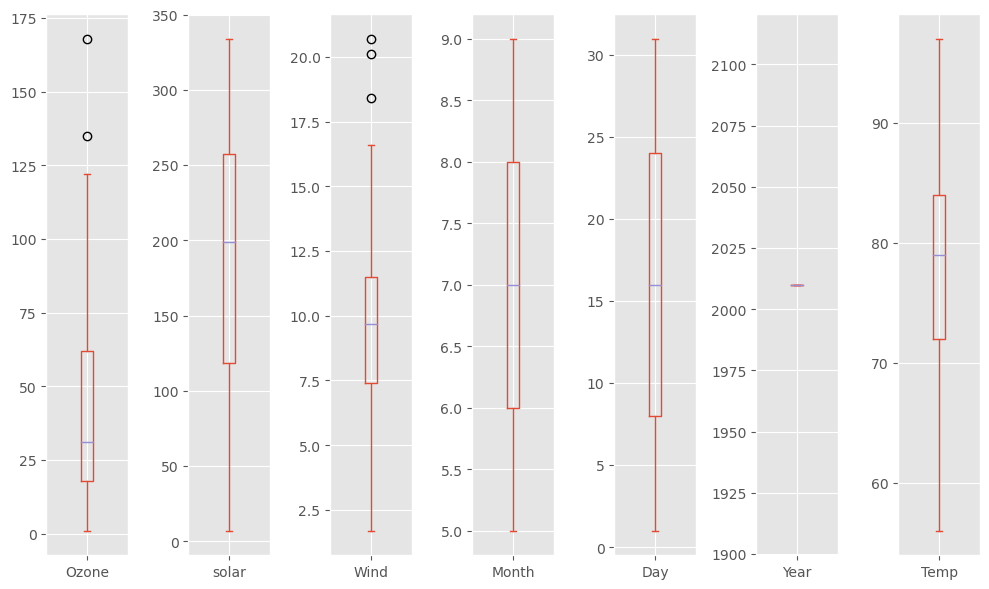

In [19]:
# using boxplots
df.plot(kind='box', subplots=True,figsize=(10,6))
plt.tight_layout();

In [20]:
df['Year'].value_counts()

2010    157
Name: Year, dtype: int64

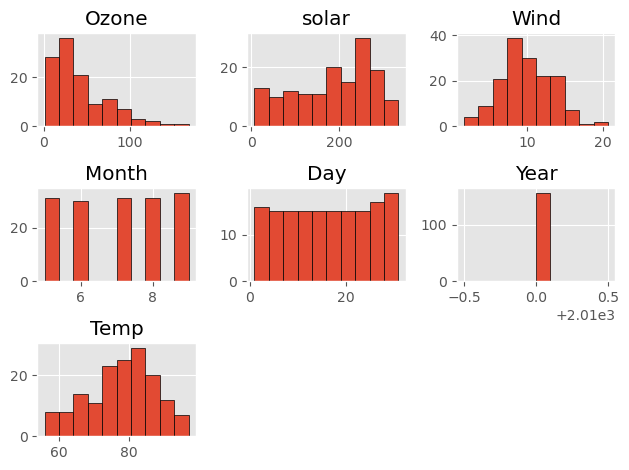

In [21]:
# histogram
df.hist(edgecolor='k')
plt.tight_layout();

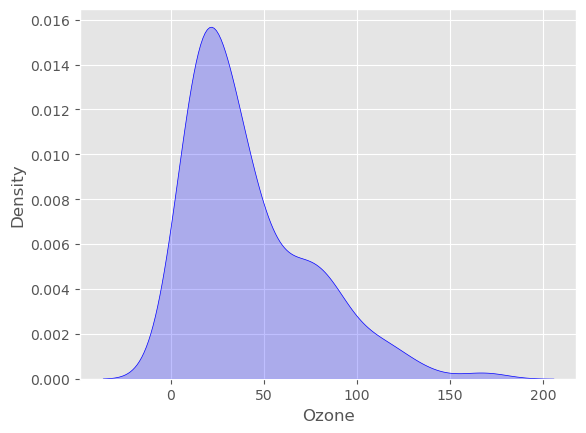

In [22]:
sns.kdeplot(data=df, x='Ozone', fill=True, color='blue');

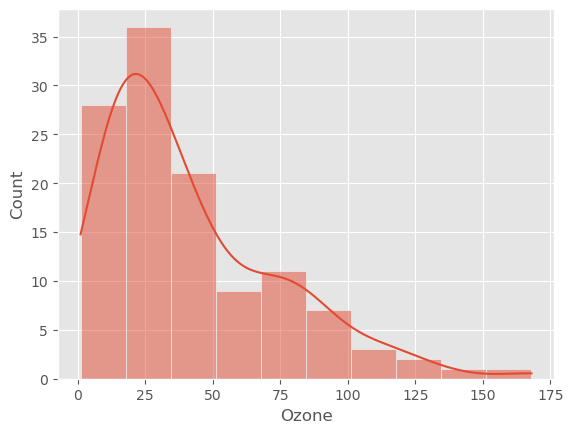

In [23]:
sns.histplot(data=df, x='Ozone',kde=True);

In [24]:
# extracting outlier values and whisker values
from matplotlib.cbook import boxplot_stats

In [25]:
# extract outlier values for `Wind`
boxplot_stats(df['Wind'])

[{'mean': 9.929936305732484,
  'iqr': 4.1,
  'cilo': 9.18627147246819,
  'cihi': 10.213728527531808,
  'whishi': 16.6,
  'whislo': 1.7,
  'fliers': array([20.1, 18.4, 20.7]),
  'q1': 7.4,
  'med': 9.7,
  'q3': 11.5}]

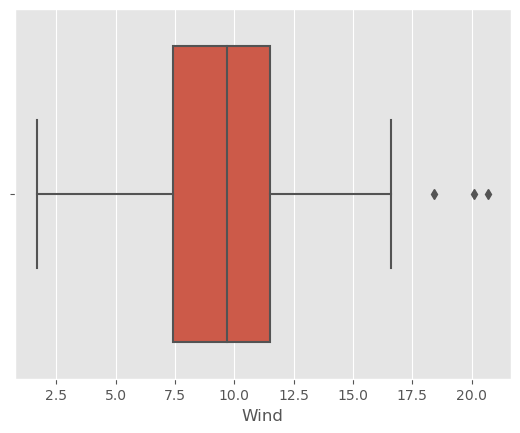

In [26]:
sns.boxplot(data=df,x='Wind');

In [27]:
boxplot_stats(df['Wind'])[0]['fliers']

array([20.1, 18.4, 20.7])

In [28]:
boxplot_stats(df['Wind'])[0]['iqr']

4.1

In [29]:
df['Wind'].median()

9.7

## Descriptive Statistics - 5 pt Summary + Mean & Std

In [30]:
df.describe().round(2)

,Ozone,solar,Wind,Month,Day,Year,Temp
count,119.00,150.00,157.00,156.00,157.00,157.0,157.00
mean,41.82,185.37,9.93,7.03,15.93,2010.0,77.75
std,32.66,89.02,3.51,1.43,8.97,0.0,9.41
min,1.00,7.00,1.70,5.00,1.00,2010.0,56.00
25%,18.00,118.50,7.40,6.00,8.00,2010.0,72.00
50%,31.00,199.00,9.70,7.00,16.00,2010.0,79.00
75%,62.00,257.50,11.50,8.00,24.00,2010.0,84.00
max,168.00,334.00,20.70,9.00,31.00,2010.0,97.00


## Missing Value Check

In [31]:
df.isnull().sum()

Ozone      38
solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [32]:
df.isnull()

,Ozone,solar,Wind,Month,Day,Year,Temp,Weather
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
152,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False
155,True,False,False,False,False,False,False,False


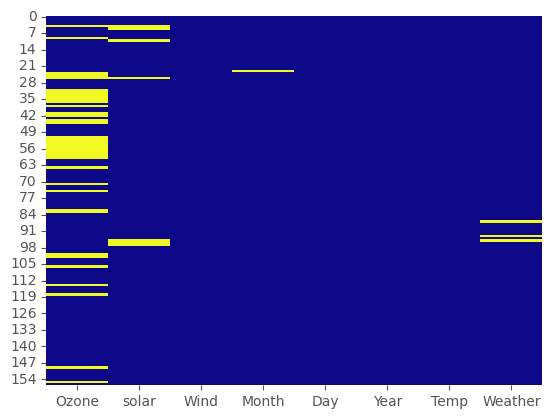

In [33]:
# Visualization of Missing Values

sns.heatmap(data=df.isnull(), cmap='plasma', cbar=False);


## Missing Value Imputation

In [34]:
# for numeric features - mean if there are no outliers, median if there are  outliers
ozone_med = df['Ozone'].median()
solar_mean = df['solar'].mean()

In [35]:
df['Ozone'] = df['Ozone'].fillna(ozone_med)
df['solar'] = df['solar'].fillna(solar_mean)

In [36]:
df['Month'].mode()

0    9.0
Name: Month, dtype: float64

In [37]:
# imputing missing values in categorical features
month_mode = df['Month'].mode()[0]
weather_mode = df['Weather'].mode()[0]

In [38]:
df['Month'] = df['Month'].fillna(month_mode)
df['Weather'] = df['Weather'].fillna(weather_mode)

In [39]:
df.isnull().sum()

Ozone      0
solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

## Correlation Analysis

In [40]:
# correlation matrix, we should hav excluded year from correlation coeff matrix !!
corel = df.corr().round(2)
corel

,Ozone,solar,Wind,Month,Day,Year,Temp
Ozone,1.00,0.30,-0.52,0.17,-0.03,NaN,0.60
solar,0.30,1.00,-0.06,-0.10,-0.15,NaN,0.26
Wind,-0.52,-0.06,1.00,-0.16,0.03,NaN,-0.44
Month,0.17,-0.10,-0.16,1.00,0.06,NaN,0.38
Day,-0.03,-0.15,0.03,0.06,1.00,NaN,-0.12
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.60,0.26,-0.44,0.38,-0.12,NaN,1.00


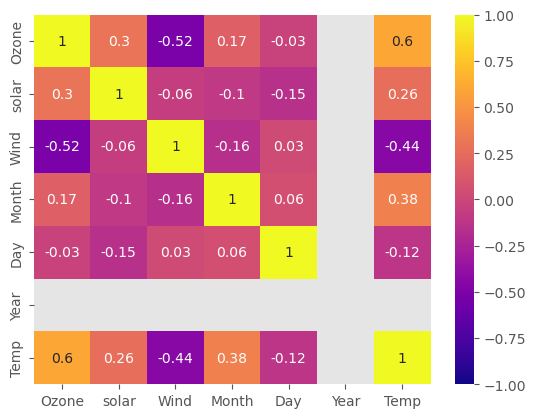

In [41]:
# visualizing correlation matrix
sns.heatmap(data=corel,
           vmin=-1,
           vmax=1,
           cmap='plasma',
           annot=True);

## Encoding Categorical Features

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    157 non-null    float64
 1   solar    157 non-null    float64
 2   Wind     157 non-null    float64
 3   Month    157 non-null    float64
 4   Day      157 non-null    int64  
 5   Year     157 non-null    int64  
 6   Temp     157 non-null    int64  
 7   Weather  157 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 11.0+ KB


In [43]:
df['Weather'].value_counts()

S     61
C     49
PS    47
Name: Weather, dtype: int64

In [44]:
df.head()

,Ozone,solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,5.0,1,2010,67,S
1,36.0,118.000000,8.0,5.0,2,2010,72,C
2,12.0,149.000000,12.6,5.0,3,2010,74,PS
3,18.0,313.000000,11.5,5.0,4,2010,62,S
4,31.0,185.366667,14.3,5.0,5,2010,56,S


In [46]:
# one-hot encoding
ohe_df = pd.get_dummies(df,drop_first=True)
ohe_df.head()

,Ozone,solar,Wind,Month,Day,Year,Temp,Weather_PS,Weather_S
0,41.0,190.000000,7.4,5.0,1,2010,67,0,1
1,36.0,118.000000,8.0,5.0,2,2010,72,0,0
2,12.0,149.000000,12.6,5.0,3,2010,74,1,0
3,18.0,313.000000,11.5,5.0,4,2010,62,0,1
4,31.0,185.366667,14.3,5.0,5,2010,56,0,1


In [47]:
# from sklearn.preprocessing import OneHotEncoder

In [48]:
# ohe = OneHotEncoder()

In [ ]:
# df['Weather'] = ohe.fit_transform(df['Weather'])

In [49]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Weather'] = le.fit_transform(df['Weather'])
df.head()

,Ozone,solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,5.0,1,2010,67,2
1,36.0,118.000000,8.0,5.0,2,2010,72,0
2,12.0,149.000000,12.6,5.0,3,2010,74,1
3,18.0,313.000000,11.5,5.0,4,2010,62,2
4,31.0,185.366667,14.3,5.0,5,2010,56,2


In [50]:
df['Weather'].value_counts()

2    61
0    49
1    47
Name: Weather, dtype: int64

## Scaling the Numeric Features

### Standard Scaling

In [51]:
df.head()

,Ozone,solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,5.0,1,2010,67,2
1,36.0,118.000000,8.0,5.0,2,2010,72,0
2,12.0,149.000000,12.6,5.0,3,2010,74,1
3,18.0,313.000000,11.5,5.0,4,2010,62,2
4,31.0,185.366667,14.3,5.0,5,2010,56,2


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=df.columns)
df_std.head()

,Ozone,solar,Wind,Month,Day,Year,Temp,Weather
0,0.062828,0.053428,-0.724079,-1.430586,-1.668937,0.0,-1.146116,1.108001
1,-0.111448,-0.776816,-0.552356,-1.430586,-1.557152,0.0,-0.612802,-1.291394
2,-0.947971,-0.419350,0.764184,-1.430586,-1.445367,0.0,-0.399476,-0.091697
3,-0.738840,1.471761,0.449359,-1.430586,-1.333583,0.0,-1.679431,1.108001
4,-0.285723,0.000000,1.250731,-1.430586,-1.221798,0.0,-2.319408,1.108001


In [54]:
df_std.describe().round(3)

,Ozone,solar,Wind,Month,Day,Year,Temp,Weather
count,157.000,157.000,157.000,157.000,157.000,157.0,157.000,157.000
mean,-0.000,-0.000,-0.000,0.000,-0.000,0.0,0.000,0.000
std,1.003,1.003,1.003,1.003,1.003,0.0,1.003,1.003
min,-1.331,-2.057,-2.355,-1.431,-1.669,0.0,-2.319,-1.291
25%,-0.634,-0.673,-0.724,-0.731,-0.886,0.0,-0.613,-1.291
50%,-0.286,0.088,-0.066,-0.031,0.008,0.0,0.134,-0.092
75%,0.202,0.803,0.449,0.668,0.902,0.0,0.667,1.108
max,4.489,1.714,3.082,1.368,1.685,0.0,2.054,1.108


### MinMax Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df_mm = mm.fit_transform(df)
df_mm = pd.DataFrame(df_mm, columns=df.columns)
df_mm.head()

,Ozone,solar,Wind,Month,Day,Year,Temp,Weather
0,0.239521,0.559633,0.300000,0.0,0.000000,0.0,0.268293,1.0
1,0.209581,0.339450,0.331579,0.0,0.033333,0.0,0.390244,0.0
2,0.065868,0.434251,0.573684,0.0,0.066667,0.0,0.439024,0.5
3,0.101796,0.935780,0.515789,0.0,0.100000,0.0,0.146341,1.0
4,0.179641,0.545464,0.663158,0.0,0.133333,0.0,0.000000,1.0


In [57]:
df_mm.describe().round(3)

,Ozone,solar,Wind,Month,Day,Year,Temp,Weather
count,157.000,157.000,157.000,157.000,157.000,157.0,157.000,157.000
mean,0.229,0.545,0.433,0.511,0.498,0.0,0.530,0.538
std,0.172,0.266,0.184,0.358,0.299,0.0,0.229,0.418
min,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000
25%,0.120,0.367,0.300,0.250,0.233,0.0,0.390,0.000
50%,0.180,0.569,0.421,0.500,0.500,0.0,0.561,0.500
75%,0.263,0.758,0.516,0.750,0.767,0.0,0.683,1.000
max,1.000,1.000,1.000,1.000,1.000,0.0,1.000,1.000


In [58]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# mpg, penguins, tips - Practice EDA on these datasets